# Linear Regression

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
data = pd.read_csv('Housing.csv', index_col=0)
data.head()

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
1,42000.0,5850,3,1,2,yes,no,yes,no,no,1,no
2,38500.0,4000,2,1,1,yes,no,no,no,no,0,no
3,49500.0,3060,3,1,1,yes,no,no,no,no,0,no
4,60500.0,6650,3,1,2,yes,yes,no,no,no,0,no
5,61000.0,6360,2,1,1,yes,no,no,no,no,0,no


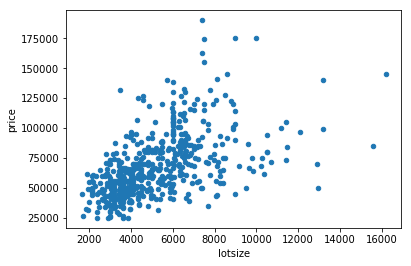

In [3]:
pl = data.plot(kind='scatter', x='lotsize', y='price')

In [4]:
def linear_regression(x, y, a=1.0e0, coef=np.array([[0],[0]]), num_iterations = 10000): 
    #normalization
    coef_x = normalize_coef(x)
    coef_y = normalize_coef(y)
    
    x = x / coef_x
    y = y / coef_y
    
    N = len(x)
    x = np.column_stack((np.ones(N, dtype=np.int16), x))
    return gradient_descent(x, y, N, a, coef, num_iterations), coef_x, coef_y

def normalize_coef(x):
    return np.amax(x)

def gradient_descent(x, y, N, a, coef, num_iterations):  
    for i in range (num_iterations):
        coef = gradient_step(x, y, N, a, coef)    
    return coef

def gradient_step(x, y, N, a, coef):
    d = predicted_value(x, y, coef) * x
    delt = a / N * np.array([(predicted_value(x, y, coef) * x).sum(axis=0)]).T
    return coef - delt

def predicted_value(x, y, coef):
    return x.dot(coef) - y

def cost_function(x, y, N, coef):
    return np.sum(np.power(predicted_value(x, y, coef), 2)) / 2 / N

def get_y(x, q, coef_x, coef_y):
    return (q[0, 0] + q[1, 0] * x /coef_x) * coef_y

lr = linear_regression(np.array(data[["lotsize"]]), np.array(data[["price"]]))

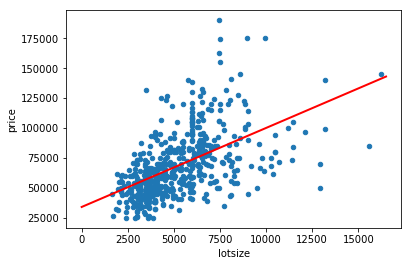

In [5]:
x = np.arange(0.0, 16500.0)
y = get_y(x, lr[0], lr[1], lr[2])

pl1 = data.plot(kind='scatter', x='lotsize', y='price')
plt.plot(x, y, c='red', linewidth=2)